In [1]:
import numpy
import scipy.special
import matplotlib.pyplot
%matplotlib inline

# neural network class definition

class neuralNetwork:
    # initialise the neural network 
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        
        # set number of nodes in each input, hidden, output nodes
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # link weight matrices, wih and who
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer 
        # w11 w21
        # w12 w22 etc
        # numpy.random.normal(loc,scale,size)
        # loc = (Mean) where the peak of the bell exists.
        # scale = (Standard Deviation) how flat the graph distribution should be.
        # size = The shape of the returned array.
        
        self.wih = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))
        
        # learning rate
        self.lr = learningrate 
        
        # activition function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)

        pass
    
    # train the neural network
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin = 2).T
        targets = numpy.array(targets_list, ndmin = 2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs) 
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate the signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # error is (target - actual)
        output_errors = targets - final_outputs
        # hidden layer error is output_errors, split by weights, recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors)
        
        # update the weights for the links between the hidden and output layers 
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0-final_outputs)), numpy.transpose(hidden_outputs))
        
        # update the weights for the links between the input and hidden layer
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0-hidden_outputs)), numpy.transpose(inputs))
        
        pass
    
    # query the neural netwrok 
    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin = 2).T
        
        #calculate signals into hidden layers 
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs
        
    

In [2]:
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

# learning rate
learning_rate = 0.1

# create instance of neural network
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [3]:
# load the mnist training data CSV file into a list 
training_data_file = open("mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

In [4]:
#train the neural network

# go through all the records in training data set
epochs = 10

for e in range(epochs):
    for records in training_data_list:
        # split the records by the ',' commas 
        all_values = records.split(',')
        # scale and shift the input
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # create the target output values (all 0.01, except the desired label which is 0.99)
        targets = numpy.zeros(output_nodes) + 0.01 
        # all_values[0] is the target label for this record 
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        pass



In [5]:
test_data_file = open("mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [104]:
# test the neural network 

# scorecard for how well the network performs, initially empty
scorecard = []

# go through all the records in the data set

for record in test_data_list:
    # split the record by the ',' commas
    all_values = record.split(',')
    # correct answer is first value 
    correct_label = int(all_values[0])
    #print(correct_label, "correct label")
    # scale and shift the input
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # query the network
    outputs = n.query(inputs)
    # the index of the highest value corresponds to the label 
    label = numpy.argmax(outputs)
    #print(label, "network's answer")
    # append the correct or incorrect to the list 
    if (label == correct_label):
        # network's answer matches correct answer, add 1 to the scorecard
        scorecard.append(1)
    else:
        # network's answer doesn't match correct answer, add 0 to the scorecard
        scorecard.append(0)
        pass
    pass
  


    
    

In [7]:
scorecard_array = numpy.asarray(scorecard)
print("Performance", scorecard_array.sum() / scorecard_array.size)

Performance 0.9754


In [ ]:
# for learning rate 0.06, hidden nodes = 100
# performance: 0.946

In [ ]:
# for learning rate 0.03 , hidden nodes = 100
# performance: 0.9389

In [ ]:
# for learning rate 0.3, hidden nodes = 100
# performance: 0.9435

In [ ]:
# for learning rate 0.1, hidden nodes = 100
# performance: 0.9531

In [ ]:
# for learning rate 0.1, hidden nodes = 200, epochs = 5
# performance: 0.9723

## Tesing by using my own handwriting 

These digits were created by Windows default Paint tool.

In [8]:
import imageio

Min:  0.01
Max:  1.0
[[9.71963096e-01]
 [2.75967005e-03]
 [1.37213494e-02]
 [1.68663942e-03]
 [2.87580384e-03]
 [2.91131590e-03]
 [9.55197257e-04]
 [2.49119941e-03]
 [7.26821881e-03]
 [2.97392354e-03]]


Network identified:  0


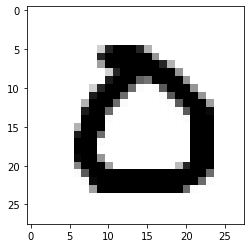

In [102]:
# test the neural network with our own image

# load image data from png file to an array
img_array = imageio.imread("My digit/0.png", as_gray = True)

# reshape from 28x28 to list of 784 array and invert the values
img_data = 255.0 - img_array.reshape(784)

# scale the data into 0.01 to 1.0
img_data = (img_data / 255 * 0.99) + 0.01
print("Min: ", numpy.min(img_data))
print("Max: ", numpy.max(img_data))

# plot image 
matplotlib.pyplot.imshow(img_data.reshape((28,28)), cmap = 'Greys',  interpolation = 'None')

# query the network
outputs = n.query(img_data)
print(outputs)

# index to the highest value  corresponds to the lebel 
label = numpy.argmax(outputs)
print('\n\nNetwork identified: ', label)

In [93]:
# This function will take image file path and check the digit


def check(image_path):
    img_array = imageio.imread(image_path, as_gray=True)
    img_data  = 255.0 - img_array.reshape(784)
    img_data = (img_data / 255.0 * 0.99) + 0.01
    matplotlib.pyplot.imshow(img_data.reshape(28,28), cmap='Greys', interpolation='None')
    outputs = n.query(img_data)
    label = numpy.argmax(outputs)
    print('Network identified the digit as ', label)
    

Network identified the digit as  0


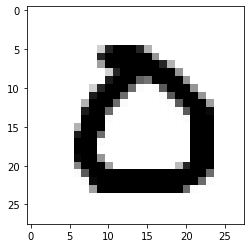

In [94]:
check('My digit/0.png')

Network identified the digit as  1


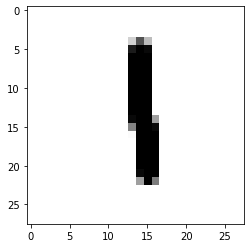

In [77]:
check('My digit/1.png')

Network identified the digit as  2


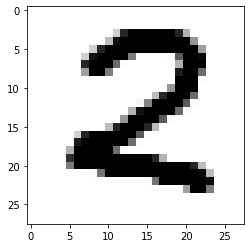

In [78]:
check('My digit/2.png')

Network identified the digit as  3


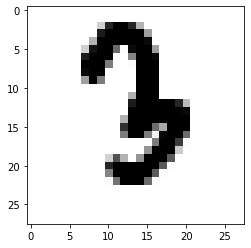

In [79]:
check('My digit/3.png')

Network identified the digit as  4


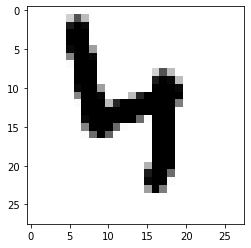

In [80]:
check('My digit/4.png')

Network identified the digit as  5


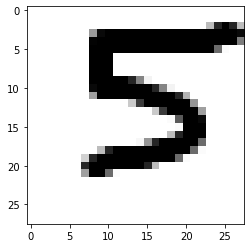

In [81]:
check('My digit/5.png')

Network identified the digit as  6


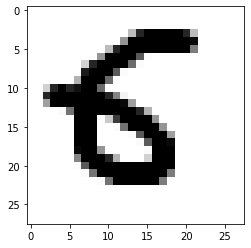

In [82]:
check('My digit/6.png')

Network identified the digit as  7


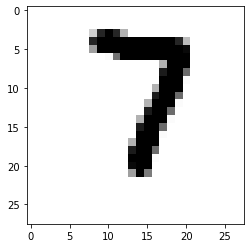

In [83]:
check('My digit/7.png')

Network identified the digit as  8


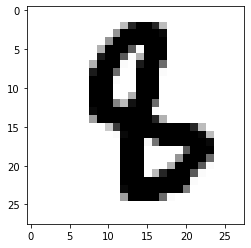

In [84]:
check('My digit/8.png')

Network identified the digit as  8


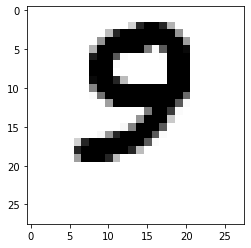

In [85]:
check('My digit/9.png')